In [2]:
#https://cpp-learning.com/causalnex/
### http://www.cs.man.ac.uk/~gbrown/bayes_nets/#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.datasets import load_boston

from causalnex.structure.notears import from_pandas
from causalnex.structure import StructureModel

In [3]:
boston = load_boston()
 
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names) # 説明変数
boston_df['PRICE'] = boston.target # 目的変数を追加
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [4]:
SM = from_pandas(boston_df)

/Users/mikami_hidenori/anaconda3/envs/data/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/mikami_hidenori/anaconda3/envs/data/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


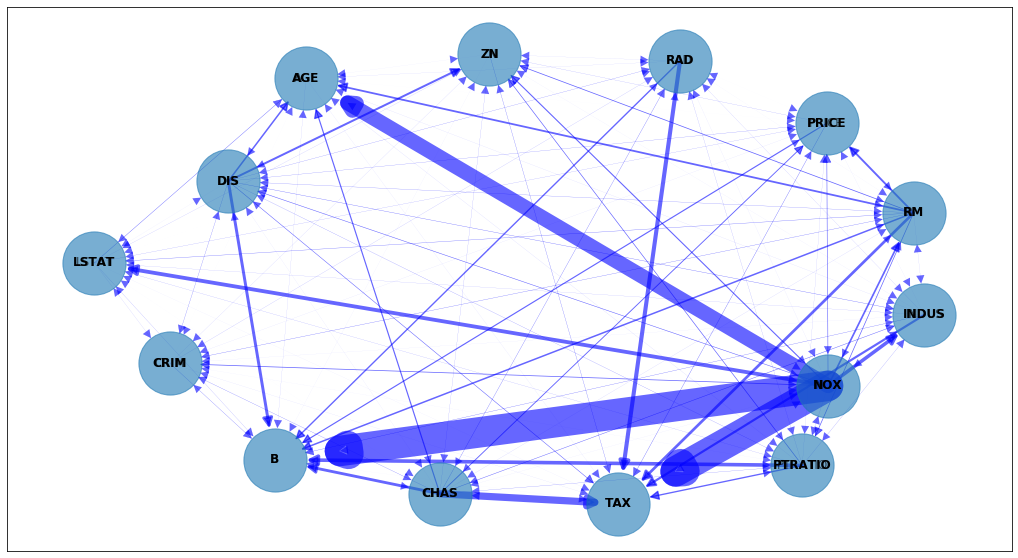

In [5]:
plt.figure(figsize=(18,10))
pos = nx.spring_layout(SM, k=60)
 
edge_width = [ d['weight']*0.3 for (u,v,d) in SM.edges(data=True)]
nx.draw_networkx_labels(SM, pos, fontsize=16, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(SM,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)

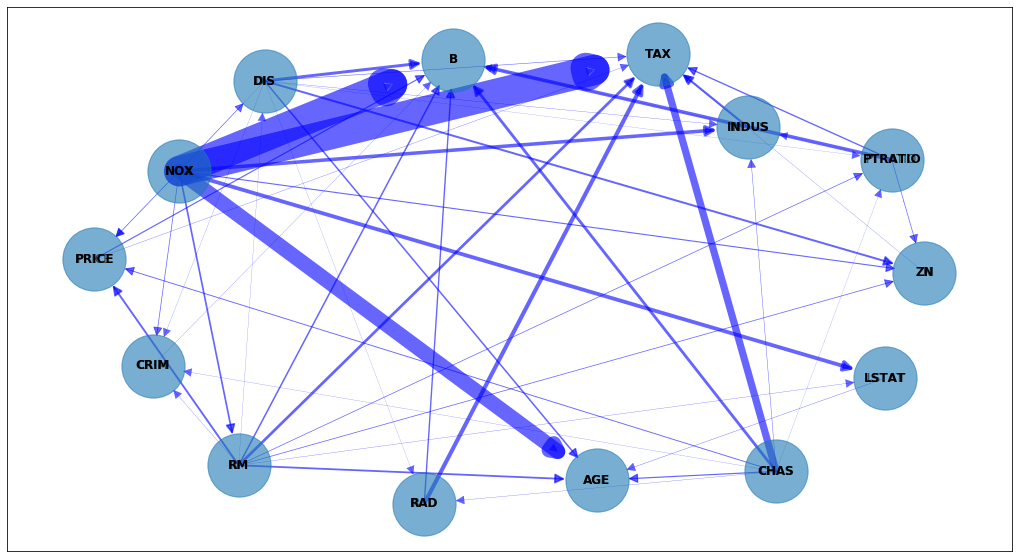

In [6]:
# グラフをコピー
COPY_SM = SM.copy()

# 因果関係の弱いエッジを削除
COPY_SM.remove_edges_below_threshold(0.5)

# 可視化
plt.figure(figsize=(18,10))
pos = nx.spring_layout(COPY_SM, k=60)

edge_width = [ d['weight']*0.3 for (u,v,d) in COPY_SM.edges(data=True)]
nx.draw_networkx_labels(COPY_SM, pos, fontsize=16, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(COPY_SM,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)

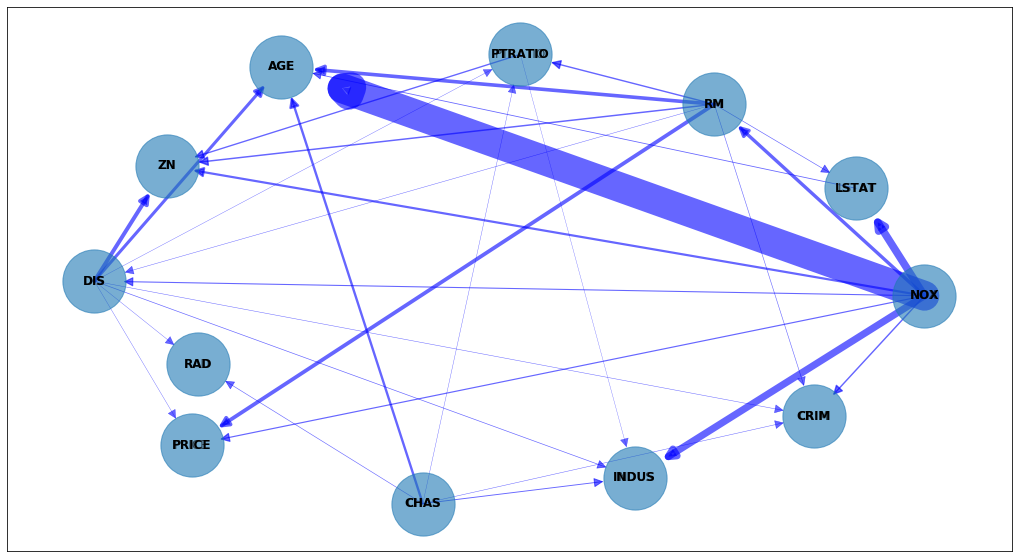

In [7]:
# グラフをコピー
D_SM = SM.copy()

# 因果関係の弱いエッジを削除
D_SM.remove_edges_below_threshold(0.5)

# ノード削除
D_SM.remove_nodes_from(['TAX', 'B'])

# エッジ削除
D_SM.remove_edge('CHAS', 'PRICE')

# 可視化
plt.figure(figsize=(18,10))
pos = nx.spring_layout(D_SM, k=60)

edge_width = [ d['weight']*0.6 for (u,v,d) in D_SM.edges(data=True)]
nx.draw_networkx_labels(D_SM, pos, fontsize=16, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(D_SM,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)